### Import Library

In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [40]:
data = pd.read_csv("mcdonalds.csv")

data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [41]:
data.shape

(1453, 15)

In [42]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [43]:
data.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [45]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [46]:
data.replace({"Yes": 1, "No": 0}, inplace=True)
#col_means = np.round(mcdonalds.mean(), 2)
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [47]:
MD_x = data.iloc[:, :11]

pca = PCA()
MD_pca = pca.fit(MD_x)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.2093

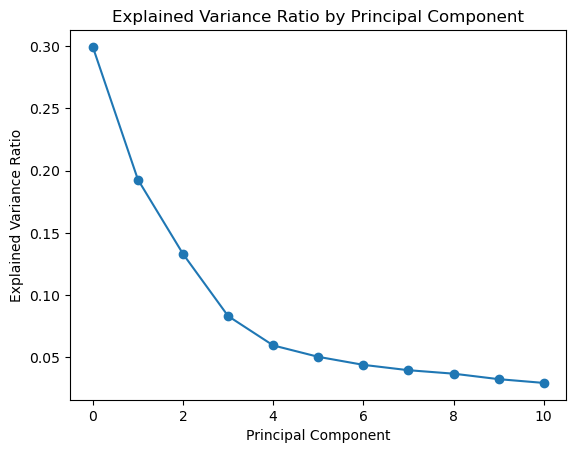

In [48]:
plt.figure()
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

In [49]:
X = data.iloc[:, 0:11].values
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=1234)
kmeans.fit(X)
cluster_labels = kmeans.labels_
print("Cluster Labels:", cluster_labels)

Cluster Labels: [2 3 3 ... 3 0 1]


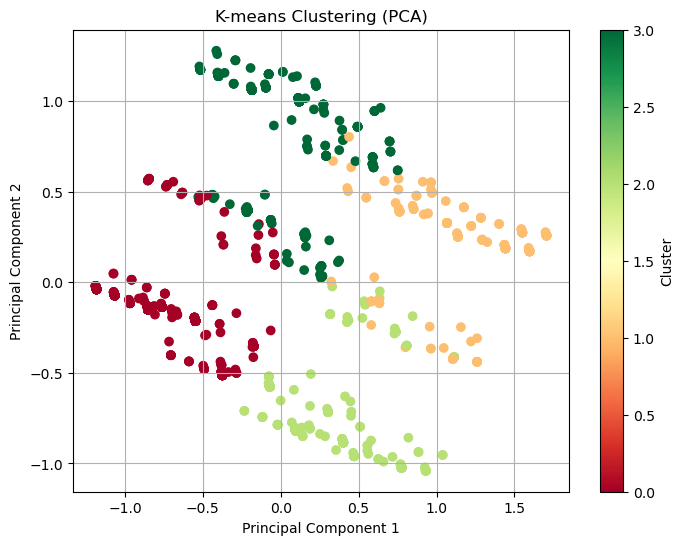

In [50]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='RdYlGn')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (PCA)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

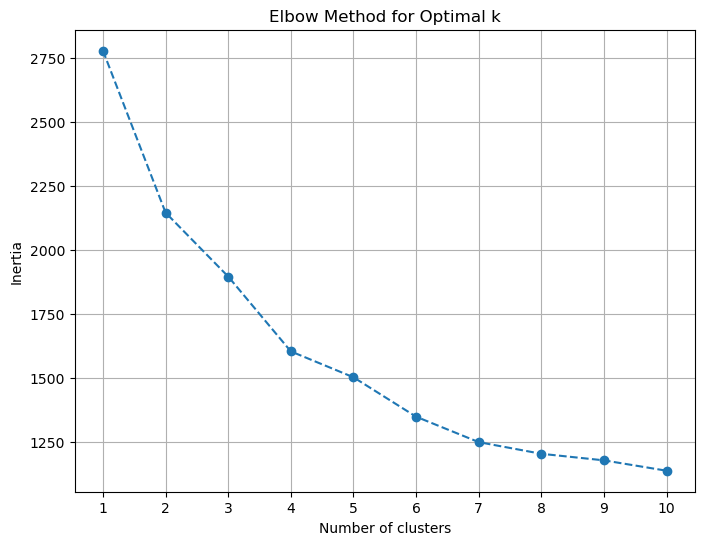

In [51]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='dashed')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [52]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=1234)
cluster_labels = kmeans.fit_predict(X)

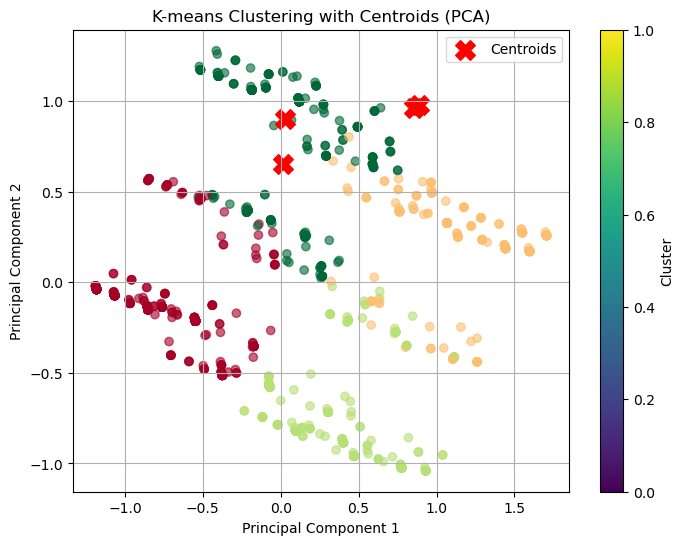

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='RdYlGn', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with Centroids (PCA)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.26


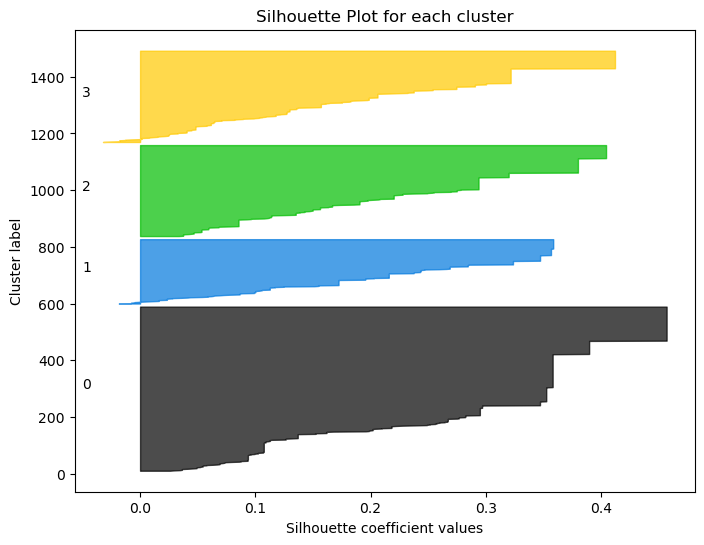

In [55]:
sample_silhouette_values = silhouette_samples(X, cluster_labels)

plt.figure(figsize=(8, 6))
plt.plot()
y_lower = 10

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / optimal_k)

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')
plt.title('Silhouette Plot for each cluster')
plt.show()

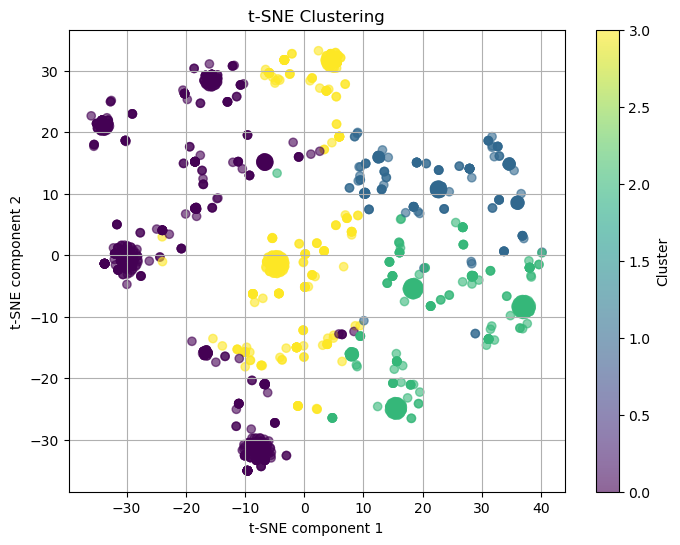

In [56]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=1234)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()